<a href="https://colab.research.google.com/github/FedorSavchenko/04.HW_KAGGLE_RSP_/blob/main/HW_Python_Advanced_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data/train.csv")

In [ ]:
# Apply the default theme
sns.set_theme()

# 1.  train.csv Попробуем понять что за данные.
По услолвиям задачи нужно найти характеристики влияющие не успеваемость студентов. На первый взгляд по описанию полей критерием успеваемости является свойство данных answered_correctly связанное напрямую с user_id и content_id. Поробуем понять как они связяны в совокупностис остальными полям и выведем статистические данные.

In [ ]:
pd.set_option('display.max_rows', 500)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [ ]:
df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [ ]:
unique_values = []
for i in df.columns:
    unique_values.append(df[i].nunique())

In [ ]:
pd.DataFrame(index = df.columns, data = unique_values)

,0
row_id,101230332
timestamp,72821015
user_id,393656
content_id,13782
content_type_id,2
task_container_id,10000
user_answer,5
answered_correctly,3
prior_question_elapsed_time,3258
prior_question_had_explanation,2


In [ ]:
user_answers = df.groupby("user_answer").agg({"answered_correctly":["count","sum","mean"]})
user_answers["prc"] = user_answers.iloc[:,1]/user_answers.iloc[:,0]
user_answers

answered_correctly                           prc
                         count       sum      mean          
user_answer                                                 
-1                     1959032  -1959032 -1.000000 -1.000000
 0                    28186489  18541782  0.657825  0.657825
 1                    26990007  17478056  0.647575  0.647575
 2                    18010020  12042471  0.668654  0.668654
 3                    26084784  17182318  0.658710  0.658710

Правильность равномерна распределена по параметру user_answer, есть смысл это поле удалить

In [ ]:
# making data smaller
df["prior_question_had_explanation"].fillna(value = -1, inplace = True)
df["prior_question_had_explanation"] = df["prior_question_had_explanation"].astype("int8")
df["user_id"] = df["user_id"].astype("int32")
df["content_type_id"] = df["content_type_id"].astype("int8")
df["content_id"] = df["content_id"].astype("int16")
df["task_container_id"] = df["task_container_id"].astype("int16")
df["prior_question_elapsed_time"] = df["prior_question_elapsed_time"].astype("float32")
df["answered_correctly"] = df["answered_correctly"].astype("int8")
df.drop(
    columns = ["row_id","user_answer"],
    inplace = True
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 8 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   answered_correctly              int8   
 6   prior_question_elapsed_time     float32
 7   prior_question_had_explanation  int8   
dtypes: float32(1), int16(2), int32(1), int64(1), int8(3)
memory usage: 2.2 GB


In [ ]:
content_per_user = (
    df
    .groupby(["user_id"])
    .agg({"content_id":["count"]})
)

In [ ]:
content_per_user.describe()

,content_id
,count
count,393656.000000
mean,257.154297
std,747.550934
min,1.000000
25%,30.000000
50%,41.000000
75%,157.000000
max,17917.000000


In [ ]:
unique_content_per_user = (
    df
    .groupby(["user_id"])
    .agg({"content_id":["nunique"]})
)

In [ ]:
unique_content_per_user.describe()

,content_id
,nunique
count,393656.000000
mean,225.356812
std,601.033096
min,1.000000
25%,29.000000
50%,40.000000
75%,145.000000
max,11488.000000


## *На текущий момет имеем*
- Данные в таблице без пропусков
- Всего 101 230 332 взаимодействий
- 393 656 ю пользовавтелями
- уникальных единиц контента 13 782
- более 50% пользователей сталкивались всего с 29 - 145 единицами контента и имеют 30 - 157 попыток.
- Есть пользователи которые взаимодельствовали с одной единицей контента больше одного раза.
- Нет ни одного пользователя который бы прошел все единицы контента.

## *Следущим шагом попробуем ответить на вопросы.*
- Максимальное количество взаимодейтвий пользователя с одной и той же единицей контента. На основе этого понять причину взаимодействия нескольких раз.
Причины могут быть 
А) Разный тип контента. 
Б) Несколько раз отвечал не правильно, до момента правильного ответа. 
В) использвал материал для закрепления знаний 
Г) Другая причина
- Выведем статистику по task_container_id
- Сделаем анализ content_type_id для пользователей
- А так же взаимосвязь prior_question_had_explanation с content_type_id. Из описания не совсем понятно значение этого поля.
А) Для лбього content_id существует оба значения content_type_id?
Б) prior_question_had_explanation наступает после content_type_id == 1?


In [ ]:
def max_user_interactions_for_same_content_id(user_id):
    id_vc = df.loc[
        df["user_id"] == user_id, 
        "content_id"
    ].value_counts()
    #returning [content_id wich max times used, count using]
    return [id_vc.index[0], id_vc.iloc[0]]

user_id_vc = df["user_id"].value_counts()


# find max content_id counts for fist USERS_FOR_RESEARCH from most active users. 
USERS_FOR_RESEARCH = 200
users_list = []
for i in range(USERS_FOR_RESEARCH):
    user_id = user_id_vc.index[i]
    users_list.append(
        # there is a row for new DataFrame 
        # user_id,  user total interactions, content_id, countcontent using 
        [user_id, user_id_vc.loc[user_id]] + max_user_interactions_for_same_content_id(user_id)
    )

max_conent_ids = pd.DataFrame(
    data = users_list, 
    columns = ["user_id","attempts","content_id","count"]
)

max_conent_ids.sort_values(
    by = ["count"], 
    axis = 0, 
    inplace = True,
    ascending = False
)

display(max_conent_ids.head(10))


In [ ]:
# Displaying rows for several users who have repeating content_id 's
for index in range(0,30,10):
    user_id = max_conent_ids.iloc[index]["user_id"]
    content_id = max_conent_ids.iloc[index]["content_id"]
    user_mask = df["user_id"] == user_id
    content_mask = df["content_id"] == content_id 
    rows = df[user_mask & content_mask]
    display(rows.head(80))
    print(rows["answered_correctly"].value_counts())
    print("task_container_id unique = ",
        rows["task_container_id"]
        .value_counts()
        .iloc[0] == 1
    )

,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
23319191,15722298682,499347415,10645,0,2954,1,21000.0,1
23323567,26336682946,499347415,10645,0,5687,1,22000.0,1
23323578,26344760702,499347415,10645,0,5698,0,22000.0,1
23323600,26346781919,499347415,10645,0,5710,1,23000.0,1
23323667,26357640423,499347415,10645,0,5734,1,57500.0,1
23323732,26376090084,499347415,10645,0,5759,1,23000.0,1
23323876,27162135155,499347415,10645,0,5821,1,23000.0,1
23323882,27287668650,499347415,10645,0,5827,1,22000.0,1
23323884,27287861725,499347415,10645,0,5829,1,22000.0,1
23324150,27498127972,499347415,10645,0,5925,1,23000.0,1


1    82
0     1
Name: answered_correctly, dtype: int64
task_container_id unique =  True


,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
96266929,2653244776,2042598372,781,0,3346,0,19000.0,1
96267885,3130621174,2042598372,781,0,4241,0,16000.0,1
96268192,3437258037,2042598372,781,0,4533,0,21000.0,1
96268324,3485813184,2042598372,781,0,4665,0,19000.0,1
96268335,3486719326,2042598372,781,0,4676,0,20000.0,1
96268342,3487424435,2042598372,781,0,4683,0,34000.0,1
96268345,3487660056,2042598372,781,0,4686,1,18000.0,1
96269301,3879132579,2042598372,781,0,5612,0,18000.0,1
96269687,3994341344,2042598372,781,0,5875,0,17000.0,1
96269724,4040537637,2042598372,781,0,5897,0,15000.0,1


0    11
1     7
Name: answered_correctly, dtype: int64
task_container_id unique =  True


,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
26528967,809376470,566248290,1315,0,321,0,14000.0,1
26528979,810172845,566248290,1315,0,334,1,10000.0,1
26530899,4018042455,566248290,1315,0,1944,0,11000.0,1
26530905,4019276919,566248290,1315,0,1950,1,11000.0,1
26534397,9690104838,566248290,1315,0,3921,0,20000.0,1
26534408,9699707296,566248290,1315,0,3932,0,16000.0,1
26534454,9708386035,566248290,1315,0,3970,1,20000.0,1
26534496,9765968455,566248290,1315,0,4012,1,21000.0,1
26534566,9802214399,566248290,1315,0,4080,1,19000.0,1
26539892,32080878287,566248290,1315,0,6627,0,17000.0,1


0    7
1    7
Name: answered_correctly, dtype: int64
task_container_id unique =  True


**Вывод:** 

Есть пользователь у которого встречался один и тот же content_id - 83 раза. 
Каждый повторяющегося content_id имеет свой task_container

In [ ]:
# task_container_id
unique_task_container_id_per_user = (
    df
    .groupby(["user_id"])
    .agg({"task_container_id":["nunique"]})
)
unique_task_container_id_per_user.describe()


,task_container_id
,nunique
count,393656.000000
mean,199.266946
std,556.204181
min,1.000000
25%,17.000000
50%,36.000000
75%,135.000000
max,10000.000000


In [ ]:
content_id_per_user_task_container = (
    df
    .groupby(["task_container_id"])
    .agg({"content_id":["nunique"]})
)

In [ ]:
content_id_per_user_task_container.describe()

,content_id
,nunique
count,10000.000000
mean,2810.707800
std,3217.726329
min,168.000000
25%,413.750000
50%,1236.000000
75%,4327.250000
max,11658.000000


In [ ]:
content_id_per_user_task_container.sort_values(by="task_container_id")

,content_id
,nunique
task_container_id,
0,5230
1,6236
2,4882
3,5975
4,5788
...,...
9995,190
9996,182


**Вывод:**

 - Есть пользователи которые встречались со всеми task_container_id
 - task_contailer_id встречается с разным количеством content_id от 168 до 11658
 - медина встречи content_id c task_id = 1236 
 - Так же если сравнить квантили(25%, 50%, 75%) значение content_id для пользователя [29, 40, 145] и кванитили для task_container_id [17, 26 , 135] можно сделать предварительный вывод что  task_container_id для пользовтеля меняются достаточно часто с частотой 1-2 вопроса на task_container_id

 

In [ ]:
# selecting users which attepms close to median value == 41.
# adding timestamp as minutes

mask = content_per_user[content_per_user.columns[0]] == 41
users_for_reserach = content_per_user[mask]

for i in range(0,100, 10):
    user_id = users_for_reserach.index[i]
    user_data = df[df["user_id"] == user_id]
    minutes = user_data.loc[:,"timestamp"].apply(
        lambda x: x // (1000 * 60)
    )
    timestamp_diff = user_data["timestamp"] - user_data["timestamp"].shift(1) 
    user_data.insert(2, "minutes", minutes)
    user_data.insert(3, "ts_diff", timestamp_diff.values.astype('int64'))
    display(user_data)
    


**Вывод:**
    
*timestamp*

- в пределах одного task_container_id - timestamp одинаков
- timestamp[-1] -  timestamp[-2] > prior_question_elapsed_time.

*content_type_id*

- У пользователя может не быть лекций вообще
- content_type_id не влияет на показатель prior_question_had_explanation

*task_container_id*

- Идет в инкрементальном порядке 1, 2, 3, 4 
- task_container_id не влияет на количство подряд идущих вопросов в рамках этого контейнера
- соличкство вопросов в  task_container_id в среднем колеблется от 1 до 5
- Замечена тенденция чем больше значение  task_container_id тем меньше количество content_id встречается в связке с ним.
Вероятно task_container_id это порядковый номер группы вопроса в хронологии действий пользователя

*user_answer*	*answered_correctly*

- Исследование и зависимости оставим на следующий этап исследования.
- Но при content_type_id == 1 оба этих значения принимают -1

*prior_question_elapsed_time*

- меньше чем разица timestamp двух предыдущих вопросов. Т.е. это значение относитися к предыдущему ответу пользователя, соотвественно этот параметр нужно будет сдвинуть вверх.

*prior_question_had_explanation*

- Но при content_type_id == 1 принимает значение False
- Как и prior_question_elapsed_time относится к предыдущему вопросу соответсвнно нужно сдвинуть вверх.

## *На текущий момет имеем*
Несколько кандидатов - признаков, которые могут влиять на правильность ответа пользователя.

А) **Затраченное время**

prior_question_elapsed_time, влияет ли длительность на правильный ответ. Перед анализом стоит сдвинуть значения на 1 вверх

Б) **Сложность вопроса** 
content_id собрать статистику правильных ответов. Вопрос может быть сложный или простой, соотвественно у него может быть различная вероятногсть правильного ответа.

В) **Были ли объяснения** 
значение prior_question_had_explanation

Г) **Средняя скорость ответа пользователя** 
Личностная характеристика пользователя. Проверка средней скорости ответа пользователя на процент правильных ответов

Д) **Повторный вопрос** 
Встречался ли вопрос раньше и был ли дан на него правильный ответ.

Ж) **Влияние лекций** 
Количество лекции на общий балл



## *Следующими шагами.*
- Посмотрим 2 дополнительные таблицы. lectures и questions
- Далее будем исследовать гипотезы влияния полей на успешные ответы пользователя



# 2.  Questions.csv Попробуем понять что за данные.
Проанализируем какие признаки мы можем взять в дополнение к нашей таблице

In [ ]:
df_q = pd.read_csv("data/questions.csv")
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [ ]:
display(df_q.head())
display(df_q.tail())

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


,question_id,bundle_id,correct_answer,part,tags
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125
13522,13522,13522,3,5,55


In [ ]:
df_q.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [ ]:
# interesting to see question which repeating 83 timea for one user.
df_q[df_q["question_id"] == 10645]

,question_id,bundle_id,correct_answer,part,tags
10645,10645,10645,3,1,9 10 92


Отличаются ли question_id и bundle_id?

In [ ]:
mask = df_q["question_id"] != df_q["bundle_id"]
print("columns question_id and bunlde_id are equal = " , mask.sum() == 0)
print("Max bundle = " , df_q["bundle_id"].value_counts().max())
print("unique bundles =", df_q["bundle_id"].nunique())


columns question_id and bunlde_id are equal =  False
Max bundle =  5
unique bundles = 9765


In [ ]:
# trying to get tag logic 
list_of_tags = []
list_of_parts = [] 
def tag_analyse(x):
    global list_of_tags
    global list_of_parts
    t = x["tags"]
    p = x["part"]
    if type(t) is str:
        tags = list(
            map(int, t.split())
        )
        list_of_tags = list_of_tags + tags
        list_of_parts = list_of_parts + ([p] * len(tags))
    return False

# preparing table exploded by parts
df_q.apply(tag_analyse, axis = 1)
df_tags = pd.DataFrame(
    {
        "tag":list_of_tags,
        "part":list_of_parts
    }
)
display(df_tags)

print("unique tags = ", df_tags.nunique()[0])
print("total links to tags = ", df_tags.count()[0])

,tag,part
0,51,1
1,131,1
2,162,1
3,38,1
4,131,1
...,...,...
30987,14,5
30988,8,5
30989,73,5
30990,125,5


unique tags =  188
total links to tags =  30992


In [ ]:
tags_per_parts = (
    df_tags
    .groupby(["tag"])
    .agg({"part":["nunique"]})
)

display("tags per parts", tags_per_parts.value_counts())

'tags per parts'

(part, nunique)
1                  113
2                   69
4                    5
6                    1
dtype: int64

**Вывод:**
- question_id  и bundle_id не равны.
- bundle_id может повторяться, максимальное количкство повторений = 5
- tags - всего 188 различных ID, ссылок на теги 30 992. Ссылаться на один и тот же tag могут content_id с разлияными part. Пока не понятно по какой логике они сфоромированы. 
- Part принимает значение от 1 до 7, большая часть вопросов со значением part == 5


На первый взгляд имеет смысл добавить в общую таблицу train 2 параметра, которые тоже могут влиять на успеваемость.

А) bundle_id

Б) part




# 3.  Train.csv + Questions.csv Дополняем Train.csv.
К таблице train добавляем 2 поля bundle_id и part из question.csv

In [ ]:
df = df.join(
    df_q[
        ["question_id","bundle_id","part"]
    ].set_index('question_id'), 
    on = 'content_id'
)

In [ ]:
df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,part
0,0,115,5692,0,1,1,NaN,-1,5692.0,5.0
1,56943,115,5716,0,2,1,37000.0,0,5716.0,5.0
2,118363,115,128,0,0,1,55000.0,0,128.0,1.0
3,131167,115,7860,0,3,1,19000.0,0,7860.0,1.0
4,137965,115,7922,0,4,1,11000.0,0,7922.0,1.0


Оптимизацию типов полей сделаем после присоединения данных lectures

# 4.  lectures.csv  Смотрим что за данные.
Выявляем возможно полезные поля из таблицы

In [ ]:
df_l = pd.read_csv("data/lectures.csv")
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [ ]:
display(df_l.head())
display(df_l.tail())
df_l.describe()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


,lecture_id,tag,part,type_of
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept
417,32736,82,3,concept


,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [ ]:
df_l["type_of"].value_counts()

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64

In [ ]:
df_l["part"].value_counts()

5    143
6     83
2     56
1     54
7     32
4     31
3     19
Name: part, dtype: int64

In [ ]:
# checking parts ans tag is it equal for lectures and questions 
df_l = df_l.join(
    df_q[
        ["question_id","bundle_id","part", "tags"]
    ].set_index('question_id'), 
    rsuffix = "_q",
    lsuffix = "_l",
    on = 'lecture_id'
)


In [ ]:
df_l.head(10)

,lecture_id,tag,part_l,type_of,bundle_id,part_q,tags
0,89,159,5,concept,89.0,1.0,131 36 38
1,100,70,1,concept,100.0,1.0,131 5 81
2,185,45,6,concept,185.0,1.0,131 111 81
3,192,79,5,solving question,192.0,1.0,131 104 38
4,317,156,5,solving question,317.0,2.0,143 141 38 102
5,335,114,2,concept,335.0,2.0,2 107 162 92 29
6,484,179,5,concept,484.0,2.0,62 155 163 81 29
7,641,134,6,solving question,641.0,2.0,62 90 100 162 81 29
8,761,93,1,concept,761.0,2.0,62 137 88 81 92
9,814,80,5,solving question,814.0,2.0,138 41 162 38 29


**Вывод:**
- question_id  и lecture_id не имеют прямой связи так как имет различные part значения.
- tag не являкется подмножетсвом tags, что тоже говорит о том что связи между таблицами questions и lectures не прослеживается. 
- question_id и lecture_id могут быть равны но при этом не имеют отношения друг к другу

В момент исследования влияния лекции, возможно следует учесть type_of.
Но возьмем из этой таблицы bundle_id и part добавив в train.csv




In [ ]:
#taking bundle_id and part 
df = df.join(
    df_l[
        ["lecture_id","bundle_id","part_l"]
    ].set_index('lecture_id'), 
    rsuffix = "_l",
    on = 'content_id'
)

In [ ]:
# Optimising and cleaning data frame 
df["part"].fillna(
    value = df["part_l"],
    inplace = True
);

df["bundle_id"].fillna(
    value = df["bundle_id_l"],
    inplace = True
);

df.drop(
    columns = ["part_l","bundle_id_l"],
    inplace = True
)

df["part"] = df["part"].astype("int8")
df["bundle_id"].fillna(value = -1, inplace = True)
df["bundle_id"] = df["bundle_id"].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   answered_correctly              int8   
 6   prior_question_elapsed_time     float32
 7   prior_question_had_explanation  int8   
 8   bundle_id                       int64  
 9   part                            int8   
dtypes: float32(1), int16(2), int32(1), int64(2), int8(4)
memory usage: 3.0 GB


# 5. Исследование гипотез и находжение характеристик влияющих на вероятность правильного ответа.
Данные все просмотрели, можно начинать поиск признаков скорректируем план действий:

1) **Средняя скорость ответа пользователя.** 
    Личностная характеристика пользователя. Проверка средней скорости ответа пользователя на процент правильных ответов

2) **Затраченное время на вопрос.**
    prior_question_elapsed_time, влияет ли длительность на правильный ответ. Перед анализом стоит сдвинуть значения на 1 вверх

3) **Были ли объяснения.** 
    значение prior_question_had_explanation какова статистика правильных ответов с пометкой True

4) **Влияние лекций.** 
    Исследовать влияние наличия лекций на правильность ответов

5) **Сложность вопроса.** 
    content_id собрать статистику правильных ответов для каждого вопроса. Вопрос может быть сложный или простой, соотвественно у него может быть различная вероятногсть правильного ответа и влияние на балл ученика.

6) **Сложность части.** 
    part из таблицы questions. собрать статистику по правильным ответам part.


##  Прежде чем проверять признаки сделаем сводную таблицу по пользователям df_user

In [ ]:
# preparing users statistic table with interactions count
user_vc = df["user_id"].value_counts()
df_user = pd.DataFrame(
    {
        "user_id":user_vc.index, 
        "interactions" :user_vc.values
    }
)
display(df_user.head())

,user_id,interactions
0,801103753,17917
1,1478712595,16914
2,1842816145,16851
3,455973631,16789
4,1660941992,16777


In [ ]:
user_avg_time = (
    df
    .groupby("user_id")
    .agg({"prior_question_elapsed_time":"mean"})
)

user_avg_time = user_avg_time / (1000 * 60)

df_user = df_user.join(
    user_avg_time,
    on = 'user_id'
)

df_user.rename(
    columns = {"prior_question_elapsed_time":"mean_elapsated_time"},
    inplace = True
)

In [ ]:
display(df_user)

,user_id,interactions,mean_elapsated_time
0,801103753,17917,0.625931
1,1478712595,16914,0.352772
2,1842816145,16851,0.537025
3,455973631,16789,0.338732
4,1660941992,16777,1.059441
...,...,...,...
393651,1032404821,1,NaN
393652,1409178561,1,NaN
393653,1137880031,1,NaN
393654,1777952220,1,NaN


In [ ]:
# remove users with single answer.
df_user = df_user.drop(
    df_user[
        df_user["interactions"] == 1
    ].index
)
display(df_user)

,user_id,interactions,mean_elapsated_time
0,801103753,17917,0.625931
1,1478712595,16914,0.352772
2,1842816145,16851,0.537025
3,455973631,16789,0.338732
4,1660941992,16777,1.059441
...,...,...,...
393564,387424196,2,0.366667
393565,1275082149,2,0.366667
393566,154840495,2,0.266667
393567,1957037146,2,0.933333


In [ ]:
# adding lectures count
user_lectures = (
    df
    .groupby("user_id")
    .agg({"content_type_id":"sum"})
)

df_user = df_user.join(
    user_lectures,
    on = 'user_id'
)

df_user.rename(
    columns = {"content_type_id":"lectures_count"},
    inplace = True
)

display(df_user)

,user_id,interactions,mean_elapsated_time,lectures_count
0,801103753,17917,0.625931,308.0
1,1478712595,16914,0.352772,72.0
2,1842816145,16851,0.537025,318.0
3,455973631,16789,0.338732,149.0
4,1660941992,16777,1.059441,368.0
...,...,...,...,...
393564,387424196,2,0.366667,0.0
393565,1275082149,2,0.366667,0.0
393566,154840495,2,0.266667,0.0
393567,1957037146,2,0.933333,0.0


In [ ]:
df_user["lectures_prc"] = df_user["lectures_count"] / df_user["interactions"]

In [ ]:
# adding correct numbers

answered_correctly = (
    df
    .groupby("user_id")
    .agg({"answered_correctly":"sum"})
)

answered_correctly_df = pd.DataFrame(
    {
        "user_id":answered_correctly.index,
        "answered_correctly": answered_correctly.values.ravel()
    }
)

df_user = df_user.join(
    answered_correctly_df.set_index("user_id"),
    on = 'user_id'
)

# we need to make correction based on lectures values becouse for that case answered_correctly == -1
df_user["answered_correctly"] = df_user["answered_correctly"] + df_user["lectures_count"]

display(df_user)


,user_id,interactions,mean_elapsated_time,lectures_count,lectures_prc,answered_correctly
0,801103753,17917,0.625931,308.0,0.017190,12698.0
1,1478712595,16914,0.352772,72.0,0.004257,12840.0
2,1842816145,16851,0.537025,318.0,0.018871,13086.0
3,455973631,16789,0.338732,149.0,0.008875,12840.0
4,1660941992,16777,1.059441,368.0,0.021935,9418.0
...,...,...,...,...,...,...
393564,387424196,2,0.366667,0.0,0.000000,1.0
393565,1275082149,2,0.366667,0.0,0.000000,2.0
393566,154840495,2,0.266667,0.0,0.000000,1.0
393567,1957037146,2,0.933333,0.0,0.000000,0.0


In [ ]:
df_user["correct_answers_prc"] = df_user["answered_correctly"] / (df_user["interactions"] - df_user["lectures_count"])
display(df_user.head())

,user_id,interactions,mean_elapsated_time,lectures_count,lectures_prc,answered_correctly,correct_answers_prc
0,801103753,17917,0.625931,308.0,0.017190,12698.0,0.721109
1,1478712595,16914,0.352772,72.0,0.004257,12840.0,0.762380
2,1842816145,16851,0.537025,318.0,0.018871,13086.0,0.791508
3,455973631,16789,0.338732,149.0,0.008875,12840.0,0.771635
4,1660941992,16777,1.059441,368.0,0.021935,9418.0,0.573953


In [ ]:
# checking are there users who have questions from different parts

minmax_part = (
    df
    .groupby("user_id")
    .agg({"part":["min","max"]})
)
minmax_part.columns = ["part, min", "part, max"]
df_user = df_user.join( minmax_part, on = 'user_id')

display(df_user)

,user_id,interactions,mean_elapsated_time,lectures_count,lectures_prc,answered_correctly,correct_answers_prc,"part, min","part, max"
0,801103753,17917,0.625931,308.0,0.017190,12698.0,0.721109,1,7
1,1478712595,16914,0.352772,72.0,0.004257,12840.0,0.762380,1,7
2,1842816145,16851,0.537025,318.0,0.018871,13086.0,0.791508,1,7
3,455973631,16789,0.338732,149.0,0.008875,12840.0,0.771635,1,7
4,1660941992,16777,1.059441,368.0,0.021935,9418.0,0.573953,1,7
...,...,...,...,...,...,...,...,...,...
393564,387424196,2,0.366667,0.0,0.000000,1.0,0.500000,1,1
393565,1275082149,2,0.366667,0.0,0.000000,2.0,1.000000,1,1
393566,154840495,2,0.266667,0.0,0.000000,1.0,0.500000,1,1
393567,1957037146,2,0.933333,0.0,0.000000,0.0,0.000000,5,5


In [ ]:
df_user.describe()

,user_id,interactions,mean_elapsated_time,lectures_count,lectures_prc,answered_correctly,correct_answers_prc,"part, min","part, max"
count,3.935690e+05,393569.000000,393569.000000,393569.000000,393569.000000,393569.000000,393569.000000,393569.000000,393569.000000
mean,1.076369e+09,257.210921,0.398227,4.977607,0.009528,165.776743,0.545202,1.404854,5.994352
std,6.201310e+08,747.623852,0.132753,15.966378,0.015394,519.428399,0.163223,0.898275,1.087001
min,1.150000e+02,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.387605e+08,30.000000,0.318576,0.000000,0.000000,11.000000,0.433333,1.000000,5.000000
50%,1.077746e+09,41.000000,0.378711,0.000000,0.000000,23.000000,0.571429,1.000000,6.000000
75%,1.613547e+09,157.000000,0.455150,2.000000,0.017094,95.000000,0.666667,2.000000,7.000000
max,2.147483e+09,17917.000000,3.847222,397.000000,0.417808,14300.000000,1.000000,7.000000,7.000000


Подготовили сводную таблицу по пользователям df_user

    user_id - id пользователя
    interactions - количество взаимодейтсвий пользователя
    mean_elapsated_time - среднее время на вопрос
    lectures_count - с каким количтвом лекций встречался пользователь
    lectures_prc - [0..1] процент лекций относительно общего количества взаимодейтсвий
    answered_correctly - количество правильный ответов на вопросы.
    correct_answers_prc - [0..1] правильность ответов в процентном отношении.
    part,min - минимальная часть вопросов или лекций
    part, max - максимальная часть вопросв или лекций

# 1) Средняя скорость ответа пользователя.
создадим категориальный признак успеваемости равномерно разбив пользователей на группы по параметру correct_answers_prc и проверим медиану и среднеквадратичное отклонение в этих группах. 

In [ ]:
def get_quatile_values(frame, field, groups):
    q_step = 1/groups
    result = []
    for i in range(groups + 1):
        result.append(
            frame[field].quantile(i * q_step)
        )
        
    return result

def check_group_relation(x, group_list):
    index = 1
    while(x > group_list[index] and index < len(group_list)-1):
        index += 1
        
    return index

In [ ]:
quantile_values = get_quatile_values(df_user, "correct_answers_prc", 5)
quantile_values 

[0.0, 0.4, 0.525, 0.6109828894119705, 0.6880733944954128, 1.0]

In [ ]:
df_user["correct_answers_group"] = df_user["correct_answers_prc"].apply(
    check_group_relation, 
    args=(quantile_values,)
)

In [ ]:
df_user.head()

,user_id,interactions,mean_elapsated_time,lectures_count,lectures_prc,answered_correctly,correct_answers_prc,"part, min","part, max",correct_answers_group
0,801103753,17917,0.625931,308.0,0.017190,12698.0,0.721109,1,7,5
1,1478712595,16914,0.352772,72.0,0.004257,12840.0,0.762380,1,7,5
2,1842816145,16851,0.537025,318.0,0.018871,13086.0,0.791508,1,7,5
3,455973631,16789,0.338732,149.0,0.008875,12840.0,0.771635,1,7,5
4,1660941992,16777,1.059441,368.0,0.021935,9418.0,0.573953,1,7,3


In [ ]:
quantile_values

[0.0, 0.4, 0.525, 0.6109828894119705, 0.6880733944954128, 1.0]

In [ ]:
time_per_group = (
    df_user
    .groupby("correct_answers_group")
    .agg({"mean_elapsated_time":["count","min","max", "mean", "std","median"]})
)

display(time_per_group)

mean_elapsated_time                                     \
                                    count  min       max      mean       std   
correct_answers_group                                                          
1                                   82474  0.0  2.393333  0.382708  0.158827   
2                                   75596  0.0  2.594445  0.421352  0.141933   
3                                   78071  0.0  3.847222  0.409990  0.128930   
4                                   78732  0.0  2.083789  0.395990  0.113240   
5                                   78696  0.0  3.738333  0.382850  0.109068   

                                 
                         median  
correct_answers_group            
1                      0.372411  
2                      0.395552  
3                      0.385825  
4                      0.375112  
5                      0.365385

Среднее значние, и отклонение времени во всех группах примерно равны.

Но попробуем проверить временной порог возьмем 3% самых "быстрых" пользователей и посмотрим к какой группе правильных ответов относятся

In [ ]:
short_time = df_user["mean_elapsated_time"].quantile(0.03)
print(short_time)

0.20666666328907013


In [ ]:
df_user["really_short_time"] = df_user["mean_elapsated_time"] < short_time
correct_by_short_time = df_user.groupby("correct_answers_group").agg({"really_short_time":["sum"]})
correct_by_short_time

,really_short_time
,sum
correct_answers_group,
1,8723
2,1096
3,579
4,480
5,928


In [ ]:
correct_by_short_time.iloc[0] / correct_by_short_time.sum()

really_short_time  sum    0.738862
dtype: float64

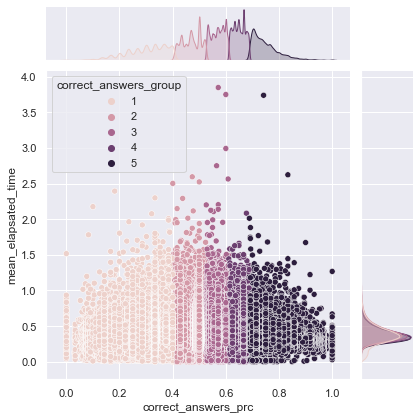

In [ ]:
sns.jointplot(data = df_user, y="mean_elapsated_time", x="correct_answers_prc", hue="correct_answers_group")

**Вывод:**

Среднее значние, и отклонение во всех группах примерно равны, немного смещена медиана во второй и четвертой группе, можно сделать вывод cкорость ответа пользователя ***не влияет*** на правильность ответов. Но в тоже время если пользователь в среднем отвечает меньше 21 секунды на ответ c вероятностью 74% он попадет в группу с самым низким баллом. Следовательно можно сказать что среднее время ответа пользователя **влиеяет** на средние количесво правильных ответов. Вероятность попадания в группу с низким балом от времени начинает возрастать при пороге в 33 секнуды.



# 2) Затраченное время на вопрос.
Проверим туже гипотезу но уже со стороны вопроса,а не со стороны пользователя. Влияет время ответа на вопрос на правильный результат.
Но для этого нужно получить данные сколько этот вопрос занял времени. В таблице время потраченное на вопрос, дано на предыдущий. Соотвественно нам нужно отсортировать train по id пользователья и timeStamp далее сдвинуть данные elepasated_time 

In [ ]:
df = df.sort_values(by = ["user_id","timestamp"])

In [ ]:
display(df.head())

,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,part
0,0,115,5692,0,1,1,NaN,-1,5692,5
1,56943,115,5716,0,2,1,37000.0,0,5716,5
2,118363,115,128,0,0,1,55000.0,0,128,1
3,131167,115,7860,0,3,1,19000.0,0,7860,1
4,137965,115,7922,0,4,1,11000.0,0,7922,1


Нужный сдвиг командой shift не сделаешь, т.к. значение может распространятся на несколько ячеек сразу, а именно ячеек с одинаковым bundle_id по этому удалим все повторяющиеся бандлы, сдвинем значения, потом соединим сдвинутые данные с новой таблицей.

In [ ]:
# selecting requied fields task container and bundle_it have same uniqueness so using task_container_id
single_bundle = df[df["content_type_id"] == 0][
    [
     "user_id",
     "task_container_id",
     "bundle_id",
     "prior_question_elapsed_time",
     "prior_question_had_explanation",
    ]
]

diff_bundle = single_bundle["bundle_id"].diff()

# droping repeating bundles
single_bundle = single_bundle.drop(
    diff_bundle[diff_bundle == 0].index, 
    axis = 0,
)

In [ ]:
single_bundle.head()

,user_id,task_container_id,bundle_id,prior_question_elapsed_time,prior_question_had_explanation
0,115,1,5692,NaN,-1
1,115,2,5716,37000.0,0
2,115,0,128,55000.0,0
3,115,3,7860,19000.0,0
4,115,4,7922,11000.0,0


In [ ]:
# shift required values
single_bundle.loc[
    :,
    [
        "prior_question_elapsed_time",
        "prior_question_had_explanation"
    ]
] = single_bundle[
        [
            "prior_question_elapsed_time",
            "prior_question_had_explanation"
        ]
    ].shift(-1)


In [ ]:
# renaming before join
single_bundle.rename(
    columns={
        "prior_question_elapsed_time": "question_elapsed_time", 
        "prior_question_had_explanation": "question_had_explanation"
    },
    inplace = True
)
single_bundle.head()

,user_id,task_container_id,bundle_id,question_elapsed_time,question_had_explanation
0,115,1,5692,37000.0,0.0
1,115,2,5716,55000.0,0.0
2,115,0,128,19000.0,0.0
3,115,3,7860,11000.0,0.0
4,115,4,7922,5000.0,0.0


In [ ]:
#restoring data back to table in requred columns
df = df.join(
    single_bundle.set_index(['user_id', 'task_container_id']), 
    rsuffix = "_l",
    on = ['user_id', 'task_container_id'],
)


In [ ]:
df.loc[40:50][["user_id","prior_question_elapsed_time","question_elapsed_time","bundle_id"]]

,user_id,prior_question_elapsed_time,question_elapsed_time,bundle_id
40,115,17000.0,14333.0,2063
41,115,17000.0,14333.0,2063
42,115,17000.0,14333.0,2063
43,115,14333.0,NaN,3363
44,115,14333.0,NaN,3363
45,115,14333.0,NaN,3363
46,124,NaN,26000.0,7900
47,124,26000.0,29000.0,7876
48,124,29000.0,26000.0,175
49,124,26000.0,18000.0,1278


Получили таблицу со сдвинутыми значениеми, теперь у нас есть время ответа на каждый вопрос а так же флаг был ли этот вопрос с объяснением.
Проверим влияет ли время вопроса на правильный ответ. 

In [ ]:
# for more readable converting elepsated time to minutes value
df["question_elapsed_time"] = df["question_elapsed_time"] / (1000 * 60)
df["question_elapsed_time"].head()

0    0.616667
1    0.916667
2    0.316667
3    0.183333
4    0.083333
Name: question_elapsed_time, dtype: float32

In [ ]:
time_per_aswered_correctly = (
    df
    .groupby("answered_correctly")
    .agg({"question_elapsed_time":["min", "max", "mean", "std","median"]})
)
display(time_per_aswered_correctly)


question_elapsed_time                                   
                                     min  max      mean       std    median
answered_correctly                                                         
-1                                   NaN  NaN       NaN       NaN       NaN
 0                                   0.0  5.0  0.466206  0.367505  0.383333
 1                                   0.0  5.0  0.414737  0.323406  0.337500

Из данной таблицы видно что время примерно одинаково распределилось между группами, немного дольше веремени приходится на неправильный ответ, но особых отклонений в той или иной группе не наблюдаетя. Проверим еще время отклонения среднестатистического времени по каждому вопросу. т.к. вопросы могут быть разной сложности.

Добавим в таблицу вопросов статистические данные.
- сколько раз встречались в train.
- сколько правильных ответов.
- процент правильных ответов.
- средняя скорость на ответ и отклонение.

In [ ]:
# there is question table
df_q.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [ ]:
question_mask = df["content_type_id"] == 0
# used times
questions_vc = df["content_id"][question_mask].value_counts()

df_q = df_q.join(
    questions_vc,
    on = ["question_id"]
)

df_q.rename(
    columns = {"content_id" : "used_times"},
    inplace = True
)
df_q.head()

,question_id,bundle_id,correct_answer,part,tags,used_times
0,0,0,0,1,51 131 162 38,6903
1,1,1,1,1,131 36 81,7398
2,2,2,0,1,131 101 162 92,44905
3,3,3,0,1,131 149 162 29,22973
4,4,4,3,1,131 5 162 38,31736


In [ ]:
# correct answers
questions_answered_correctly = (
    df[question_mask]
    .groupby("content_id")
    .agg({"answered_correctly":["sum"]})
)

questions_answered_correctly.columns = ["correct_answers"]

df_q = df_q.join(
    questions_answered_correctly,
    on = ["question_id"]
)

df_q[
    ["used_times","correct_answers"]
].head()


,used_times,correct_answers
0,6903,6266.0
1,7398,6589.0
2,44905,24890.0
3,22973,17906.0
4,31736,19461.0


In [ ]:
# new column correct_answers_prc and removing correct_answers
df_q["correct_answers_prc"] = df_q["correct_answers"] / df_q["used_times"]
df_q.drop(columns = "correct_answers", inplace = True)
df_q.sort_values(by = "correct_answers_prc", inplace = True)

In [ ]:
df_q.describe()

,question_id,bundle_id,correct_answer,part,used_times,correct_answers_prc
count,13523.00000,13523.000000,13523.000000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956,7340.922872,0.709460
std,3903.89818,3903.857783,1.149707,1.652553,11455.927774,0.164486
min,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3380.50000,3379.500000,0.000000,3.000000,1765.500000,0.609345
50%,6761.00000,6761.000000,1.000000,5.000000,4732.000000,0.734215
75%,10141.50000,10140.000000,3.000000,5.000000,8556.000000,0.835116
max,13522.00000,13522.000000,3.000000,7.000000,213605.000000,1.000000


In [ ]:
# elapsed time
questions_elapsed_time = (
    df[question_mask]
    .groupby("content_id")
    .agg({"question_elapsed_time":["mean","std"]})
)
questions_elapsed_time.columns = ["time, mean", "time, std"]

In [ ]:
df_q = df_q.join(
    questions_elapsed_time,
    on = ["question_id"]
)

In [ ]:
df_q.sort_values(by = "time, mean")

,question_id,bundle_id,correct_answer,part,tags,used_times,correct_answers_prc,"time, mean","time, std"
1485,1485,1484,0,3,136 38 29,1,0.000000,0.016667,NaN
1484,1484,1484,2,3,74 38 29,1,0.000000,0.016667,NaN
1486,1486,1484,3,3,82 38 29,1,0.000000,0.016667,NaN
10033,10033,10033,2,6,NaN,1,1.000000,0.020833,NaN
4656,4656,4656,0,5,79,29,0.896552,0.137356,0.094350
...,...,...,...,...,...,...,...,...,...
7263,7263,7260,0,7,97 42 160 35 122,7925,0.505363,1.537878,0.725495
7261,7261,7260,2,7,118 42 160 35 122,7926,0.313525,1.537895,0.725451
7260,7260,7260,2,7,118 42 160 35 122,7926,0.750442,1.537895,0.725451
7264,7264,7260,3,7,97 42 160 35 122,7926,0.584280,1.537895,0.725451


Запланированная таблица сформирована, по пути попробуем посмотреть статистику по part, правильность ответов и время потраченное на ответ

In [ ]:
df = df.join(
    df_q[["question_id","time, mean"]].set_index(["question_id"]),
    on = ["content_id"]
)

In [ ]:
df["time, median"] = df["time, mean"] -  df["question_elapsed_time"]

In [ ]:
(
    df[question_mask]
    .groupby("answered_correctly")
    .agg({"time, mean":["mean", "std"]})
)

time, mean          
                         mean       std
answered_correctly                     
0                    0.445816  0.167149
1                    0.426983  0.166403

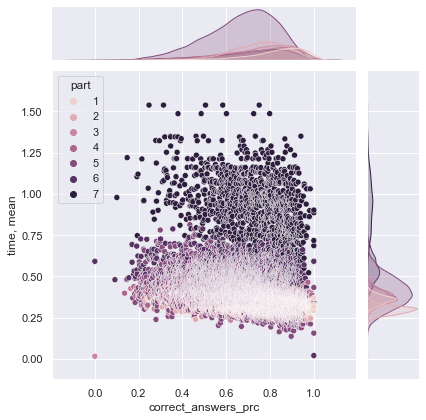

In [ ]:
sns.jointplot(data = df_q, y="time, mean", x="correct_answers_prc", hue="part")

**Вывод:**

Можно сделать вывод, среднее время ответа на вопрос **Влияет** на part, а так же на правильность ответа.


# 3) Были ли объяснения. 
Проверим Влияние флагов prior_question_had_explanation и question_had_explanation на правильный ответ 

In [ ]:
qestions_mask = df["content_type_id"] == 0

explanations_per_correct_answers_prior = (
    df[
        ["answered_correctly", "prior_question_had_explanation"]
    ]
    .groupby("answered_correctly")
    .agg({"prior_question_had_explanation":["count","sum"]})
)

explanations_per_correct_answers_prior["prc"] = (
    explanations_per_correct_answers_prior.iloc[:,1]/
    explanations_per_correct_answers_prior.iloc[:,0]
)

explanations_per_correct_answers = (
    df[
        ["answered_correctly", "question_had_explanation"]
    ]
    .groupby("answered_correctly")
    .agg({"question_had_explanation":["count","sum"]})
)

explanations_per_correct_answers["prc"] = (
    explanations_per_correct_answers.iloc[:,1]/
    explanations_per_correct_answers.iloc[:,0]
)

In [ ]:
display(explanations_per_correct_answers)
display(explanations_per_correct_answers_prior)

question_had_explanation                  prc
                                      count         sum         
answered_correctly                                              
-1                                        0         0.0      NaN
 0                                 33885537  28696990.0  0.84688
 1                                 64682340  59531710.0  0.92037

prior_question_had_explanation                   prc
                                            count         sum          
answered_correctly                                                     
-1                                        1959032         0.0  0.000000
 0                                       34026673  29184706.0  0.857701
 1                                       65244627  60108348.0  0.921277

In [ ]:
#sns.catplot(data = df, y="prior_question_had_explanation", x="answered_correctly", hue="part")

**Вывод:**

В правильных ответах количество вопросов помеченное флагами prior_question_had_explanation и question_had_explanation True немного больше чем в неправильных. Можно сказать что эта характеристика влияет на вероятрость правильного ответа. странно что question_had_explanation  и prior_question_had_explanation имеют схожую статистику.

# 4) Влияли ли лекции. 
проверим общую статистику по наличию лекций. 

In [ ]:
# taking df_user table
df_user.head()

,user_id,interactions,mean_elapsated_time,lectures_count,lectures_prc,answered_correctly,correct_answers_prc,"part, min","part, max",correct_answers_group,really_short_time
0,801103753,17917,0.625931,308.0,0.017190,12698.0,0.721109,1,7,5,False
1,1478712595,16914,0.352772,72.0,0.004257,12840.0,0.762380,1,7,5,False
2,1842816145,16851,0.537025,318.0,0.018871,13086.0,0.791508,1,7,5,False
3,455973631,16789,0.338732,149.0,0.008875,12840.0,0.771635,1,7,5,False
4,1660941992,16777,1.059441,368.0,0.021935,9418.0,0.573953,1,7,3,False


In [ ]:
# percent users who had question
df_user[ 
    df_user.eval("lectures_count > 0")
].shape[0] / df_user.shape[0]

0.3801264835390999

In [ ]:
df_user["had_lectures"] = df_user["lectures_count"].astype("bool")

In [ ]:
df_user.groupby("correct_answers_group").agg({"had_lectures":["sum"]})

,had_lectures
,sum
correct_answers_group,
1,8821
2,22030
3,33648
4,43559
5,41548


**Вывод:**

Явно выражено, что пользователей которые имеют хоть одну лекцию в группах 4 и 5 больше чем в других, следовательно наличие лекций **влияет** на общую веротяность правильных ответов.

## Более развернутое исследование влияния лекций на вероятность правильного ответа
сделаем выборку только тех кейсов, когда у пользователя встечались хоть одна лекция за всю хронологию и выведеим дополнительные данные
- Сколько лекций было просмотрено перед вопросом
- Какой тип лекции был просмотрен последним

In [ ]:
df_l["type_of"].value_counts()

concept             222
solving question    186
intention             7
starter               3
Name: type_of, dtype: int64

In [ ]:
df_l.head()

,lecture_id,tag,part_l,type_of,bundle_id,part_q,tags
0,89,159,5,concept,89.0,1.0,131 36 38
1,100,70,1,concept,100.0,1.0,131 5 81
2,185,45,6,concept,185.0,1.0,131 111 81
3,192,79,5,solving question,192.0,1.0,131 104 38
4,317,156,5,solving question,317.0,2.0,143 141 38 102


In [ ]:
u_vals = list(df_l["type_of"].unique())

In [ ]:
# convertint category to type id
for i in range(len(u_vals)):
    print(f"{u_vals[i]}= {i+1}")
df_l["type_of_id"] = df_l["type_of"].apply(lambda x: u_vals.index(x) + 1)

concept= 1
solving question= 2
intention= 3
starter= 4


In [ ]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lecture_id  418 non-null    int64  
 1   tag         418 non-null    int64  
 2   part_l      418 non-null    int64  
 3   type_of     418 non-null    object 
 4   bundle_id   158 non-null    float64
 5   part_q      158 non-null    float64
 6   tags        158 non-null    object 
 7   type_of_id  418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
df_user[["user_id","interactions","lectures_count","lectures_prc","had_lectures"]].head()

,user_id,interactions,lectures_count,lectures_prc,had_lectures
0,801103753,17917,308.0,0.017190,True
1,1478712595,16914,72.0,0.004257,True
2,1842816145,16851,318.0,0.018871,True
3,455973631,16789,149.0,0.008875,True
4,1660941992,16777,368.0,0.021935,True


In [ ]:
df = df.join(
    df_user[["user_id","had_lectures"]].set_index(["user_id"]),
    on = ["user_id"]
)

In [ ]:
df_with_l = df[
    [
        "user_id",
        "content_id",
        "content_type_id",
        "task_container_id",
        "answered_correctly",
    ]
]

добавим в таблицу тип лекции

In [ ]:
df_with_l = df_with_l.join(
    df_l[["lecture_id","type_of_id"]].set_index(["lecture_id"]),
    on = "content_id"   
)

In [ ]:
df_with_l.rename(columns = {"type_of_id":"lecture_type_before"}, inplace = True)

In [ ]:
# set to 0 lecture type if contet type not lecture
df_with_l["lecture_type_before"] = df_with_l["lecture_type_before"] * df_with_l["content_type_id"]
# preparing for ffill
df_with_l["lecture_type_before"] = df_with_l["lecture_type_before"].apply(lambda x: None if x == 0 else x)

Создаем поле lectures_before которое будет говорить сколько лекций было у пользователя до этого вопроса.

example

    u_id lect  lect_before

    1    0       0
    1    1       1
    1    0       1
    1    0       1
    2    0       0
    2    0       0
    2    1       1
    2    1       2
    3    0       0
    3    1       1
    3    0       1
    3    1       2

In [ ]:
lectures_before = df_with_l["content_type_id"].cumsum()

In [ ]:
user_changed = (df_with_l["user_id"].diff().astype("bool") * lectures_before).cummax()
df_with_l["lectures_before"] = lectures_before - user_changed

In [ ]:
df_with_l["lecture_type_before"] = (
    df_with_l["lecture_type_before"].ffill(axis = 0) * df_with_l["lectures_before"].astype("bool")
)

In [ ]:
df_with_l["lecture_type_before"].fillna(value = 0, inplace = True)

In [ ]:
df_with_l["lecture_type_before"] = df_with_l["lecture_type_before"].astype("int8")

In [ ]:
f = 85
df_with_l.loc[f:f+15]

,user_id,content_id,content_type_id,task_container_id,answered_correctly,lecture_type_before,lectures_before
85,2746,775,0,9,0,0,0
86,2746,294,0,10,1,0,0
87,2746,714,0,11,1,0,0
88,2746,297,0,12,0,0,0
89,2746,6808,1,14,-1,3,1
90,2746,297,0,15,1,3,1
91,2746,775,0,16,0,3,1
92,2746,1295,0,13,1,3,1
93,2746,10684,0,17,1,3,1
94,2746,1014,0,18,0,3,1


После нескольких преобразований у нас появилось 2 столбца **lecture_type_before** и  **lectures_before**
    
    lecture_type_before - Какой тип лекции был просмотрен последним.
    concept= 1
    solving question= 2
    intention= 3
    starter= 4
    
    lecturs_before - содержит количество лекций просмотренных перед вопросом.

In [ ]:
df_with_l["lecture_type_before"].value_counts()

1    55589927
0    23454766
2    18126201
3     4059388
4          50
Name: lecture_type_before, dtype: int64

Посмотрим статистику правильности ответов имея 2 новых поля.

In [ ]:
lecture_type_stat = df_with_l[
    df_with_l["content_type_id"] == 0 
].groupby("lecture_type_before").agg({"answered_correctly":["sum","count"]})
lecture_type_stat

answered_correctly          
                                   sum     count
lecture_type_before                             
0                           13986527.0  23454686
1                           36745231.0  54182819
2                           11827240.0  17681088
3                            2685602.0   3952660
4                                 27.0        47

In [ ]:
total_correct_answers = df["answered_correctly"][df["content_type_id"] == 0].sum()
total_answers = df["content_type_id"][df["content_type_id"] == 0].shape[0]
total_lectures =  df["content_type_id"][df["content_type_id"] == 1].shape[0]
print("total_answers = ", total_answers, "total_correct_answers = ", total_correct_answers, "correct answ prc = " ,total_correct_answers/total_answers)

total_answers =  99271300 total_correct_answers =  65244627 correct answ prc =  0.6572355454194717


In [ ]:
lecture_type_stat["correct_answer_prc"] = lecture_type_stat.iloc[:,0]/lecture_type_stat.iloc[:,1]
lecture_type_stat

answered_correctly           correct_answer_prc
                                   sum     count                   
lecture_type_before                                                
0                           13986527.0  23454686           0.596321
1                           36745231.0  54182819           0.678171
2                           11827240.0  17681088           0.668920
3                            2685602.0   3952660           0.679442
4                                 27.0        47           0.574468

In [ ]:
df_with_l

,user_id,content_id,content_type_id,task_container_id,answered_correctly,lecture_type_before,lectures_before
0,115,5692,0,1,1,0,0
1,115,5716,0,2,1,0,0
2,115,128,0,0,1,0,0
3,115,7860,0,3,1,0,0
4,115,7922,0,4,1,0,0
...,...,...,...,...,...,...,...
101230327,2147482888,3586,0,22,1,0,0
101230328,2147482888,6341,0,23,1,0,0
101230329,2147482888,4212,0,24,1,0,0
101230330,2147482888,6343,0,25,0,0,0


<AxesSubplot:xlabel='lecture_type_before', ylabel='count'>

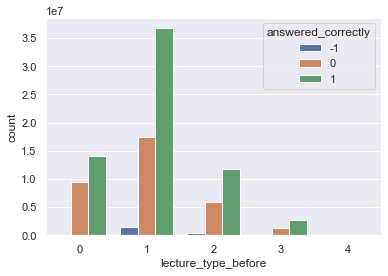

In [ ]:
sns.countplot(x='lecture_type_before',hue='answered_correctly',data=df_with_l)

**Вывод:**

 Наличие лекции перед вопросом **влияет** на статистику правильного ответа, в то же время типы лекций
 concept= 1
 solving question= 2
 intention= 3 
 распределили вероятность правильных ответов равномерно.

# 5) Сложность вопроса. 
Создадим категориальный признак difficult от 1 до 10 для вопросов, основываясь на статистике правильных ответов. Где 1 самый сложный 10 - самый простой. Если вопрос использовался меньше 10 раз то поставим значение, что сложность не определена None. И посмотрим как сложность вопросов распределена между пользователями,между частями, как сложность влияет на количество ответов.

In [ ]:
df_q.head()

,question_id,bundle_id,correct_answer,part,tags,used_times,correct_answers_prc,"time, mean","time, std"
1485,1485,1484,0,3,136 38 29,1,0.000000,0.016667,NaN
10007,10007,10005,0,6,27,1,0.000000,0.591667,NaN
1484,1484,1484,2,3,74 38 29,1,0.000000,0.016667,NaN
1486,1486,1484,3,3,82 38 29,1,0.000000,0.016667,NaN
10062,10062,10062,0,6,8,7444,0.091752,0.480523,0.279147


In [ ]:
MIN_USED_VALUE = 10
DIFFICULT_GROUP_SIZE = 10
quantile_values = get_quatile_values(
    df_q[
        df_q["used_times"] >= MIN_USED_VALUE
    ], 
    "correct_answers_prc", 
    DIFFICULT_GROUP_SIZE
)
print(quantile_values)

[0.09175174637291779, 0.47712245268925463, 0.5746165242172452, 0.638298173060112, 0.6902450123438998, 0.7342147592444166, 0.7743201496655997, 0.8147779990503391, 0.8563128801281711, 0.9030990732335493, 1.0]


In [ ]:
# making difficult property where 1 - most complex , 10 - simplest
df_q["difficult"] = df_q["correct_answers_prc"].apply(
    check_group_relation, 
    args=(quantile_values,)
)

In [ ]:
# make None for questions wich used less then MIN_USED_VALUE times
df_q["difficult"] = df_q.apply(
    lambda x: 
        x["difficult"] 
        if x["used_times"] >= MIN_USED_VALUE 
        else None,
    axis = 1
)

In [ ]:
df_q["difficult"].value_counts(True)

1.0     0.100059
10.0    0.100059
2.0     0.099985
3.0     0.099985
4.0     0.099985
5.0     0.099985
6.0     0.099985
7.0     0.099985
8.0     0.099985
9.0     0.099985
Name: difficult, dtype: float64

In [ ]:
df_q.head()

,question_id,bundle_id,correct_answer,part,tags,used_times,correct_answers_prc,"time, mean","time, std",difficult
1485,1485,1484,0,3,136 38 29,1,0.000000,0.016667,NaN,NaN
10007,10007,10005,0,6,27,1,0.000000,0.591667,NaN,NaN
1484,1484,1484,2,3,74 38 29,1,0.000000,0.016667,NaN,NaN
1486,1486,1484,3,3,82 38 29,1,0.000000,0.016667,NaN,NaN
10062,10062,10062,0,6,8,7444,0.091752,0.480523,0.279147,1.0


In [ ]:
df = df.join(
    df_q[["question_id","difficult"]].set_index("question_id"),
    on = ["content_id"],
)

In [ ]:
df[["content_id","content_type_id","answered_correctly", "difficult"]].head(10)

,content_id,content_type_id,answered_correctly,difficult
0,5692,0,1,6.0
1,5716,0,1,6.0
2,128,0,1,10.0
3,7860,0,1,10.0
4,7922,0,1,10.0
5,156,0,1,10.0
6,51,0,1,10.0
7,50,0,1,10.0
8,7896,0,1,10.0
9,7863,0,1,9.0


In [ ]:
avarage_difficlult_by_users = df.groupby("user_id").agg({"difficult":["mean"]})
avarage_difficlult_by_users

,difficult
,mean
user_id,
115,5.847826
124,1.966667
2746,5.500000
5382,4.336000
8623,3.654545
...,...
2147470770,3.912281
2147470777,5.611406


In [ ]:
avarage_difficlult_by_users.columns = ["avg_q_difficult"]
df_user = df_user.join(
    avarage_difficlult_by_users,
    on = "user_id"
)

In [ ]:
df_user["avg_q_difficult"].describe()

count    393569.000000
mean          3.836369
std           1.301678
min           1.153846
25%           2.823529
50%           3.946903
75%           4.809524
max          10.000000
Name: avg_q_difficult, dtype: float64

In [ ]:
df_user.head()

,user_id,interactions,mean_elapsated_time,lectures_count,lectures_prc,answered_correctly,correct_answers_prc,"part, min","part, max",correct_answers_group,really_short_time,had_lectures,avg_q_difficult
0,801103753,17917,0.625931,308.0,0.017190,12698.0,0.721109,1,7,5,False,True,5.220850
1,1478712595,16914,0.352772,72.0,0.004257,12840.0,0.762380,1,7,5,False,True,5.358113
2,1842816145,16851,0.537025,318.0,0.018871,13086.0,0.791508,1,7,5,False,True,5.187725
3,455973631,16789,0.338732,149.0,0.008875,12840.0,0.771635,1,7,5,False,True,5.336049
4,1660941992,16777,1.059441,368.0,0.021935,9418.0,0.573953,1,7,3,False,True,5.106802


In [ ]:
df_user.groupby("correct_answers_group").agg({"avg_q_difficult":["mean", "median","std"]})

avg_q_difficult                    
                                 mean    median       std
correct_answers_group                                    
1                            2.803246  2.153846  1.210506
2                            3.731679  3.762295  1.221479
3                            4.058548  4.114286  1.171694
4                            4.274927  4.305744  1.078688
5                            4.360485  4.435429  1.154833

**Вывод:**

Новый параметр сложности вопроса, вличяет на общий балл пользовтеля.

# 6) Влияет ли свойтво Part. 
Создадим небольшую статистику по свойству Part.

In [ ]:
df_q.groupby("part").agg({"correct_answers_prc":["median","std"]})

correct_answers_prc          
                  median       std
part                              
1               0.850797  0.146926
2               0.757252  0.124216
3               0.776585  0.162439
4               0.763729  0.179262
5               0.687825  0.156345
6               0.736717  0.181391
7               0.747240  0.163849

коеффициент правильных ответов из part1 немного выше чем в остальных

In [ ]:
df_q.groupby("part").agg({"time, mean":["median","std"]})

time, mean          
         median       std
part                     
1      0.361150  0.028465
2      0.299615  0.025344
3      0.373991  0.044210
4      0.375193  0.040023
5      0.404432  0.090853
6      0.539510  0.080810
7      0.943162  0.169511

Время затраченное на вопрос зависит от part .  меньше всего времени тратят во части номер 2, больше всего в 7 части

In [ ]:
df_q.groupby("part").agg({"difficult":["mean","std"]})

difficult          
          mean       std
part                    
1     7.478831  2.707309
2     6.018215  2.484393
3     6.191790  2.922804
4     5.874913  3.097566
5     4.663943  2.616904
6     5.463960  2.931810
7     5.684483  2.896328

**Вывод:**

Коеффициент правильных ответов больше всего в первой части, меньше всего в 5й части. Можно сказать что свойтво Part **влияет** на вероятность правильность ответа

# Финальный вид таблиц

## 1. Таблица пользователей *df_user*. Новая таблицв

In [ ]:
df_user.drop(
    columns = [
        "really_short_time",
        "lectures_count",
        "answered_correctly",
        "lectures_prc"
    ],
    inplace = True
)

In [ ]:
df_user["correct_answers_group"] = df_user["correct_answers_group"].astype("category")
df_user["avg_q_difficult"] = df_user["avg_q_difficult"].astype("float32")
df_user["correct_answers_prc"] = df_user["correct_answers_prc"].astype("float32")

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393569 entries, 0 to 393568
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   user_id                393569 non-null  int64   
 1   interactions           393569 non-null  int64   
 2   mean_elapsated_time    393569 non-null  float32 
 3   correct_answers_prc    393569 non-null  float32 
 4   part, min              393569 non-null  int8    
 5   part, max              393569 non-null  int8    
 6   correct_answers_group  393569 non-null  category
 7   had_lectures           393569 non-null  bool    
 8   avg_q_difficult        393569 non-null  float32 
dtypes: bool(1), category(1), float32(3), int64(2), int8(2)
memory usage: 12.0 MB


In [ ]:
df_user.head()

,user_id,interactions,mean_elapsated_time,correct_answers_prc,"part, min","part, max",correct_answers_group,had_lectures,avg_q_difficult
0,801103753,17917,0.625931,0.721108,1,7,5,True,5.220850
1,1478712595,16914,0.352772,0.762380,1,7,5,True,5.358112
2,1842816145,16851,0.537025,0.791508,1,7,5,True,5.187725
3,455973631,16789,0.338732,0.771635,1,7,5,True,5.336049
4,1660941992,16777,1.059441,0.573953,1,7,3,True,5.106802


## 2. Таблица вопросов *df_q* измененнвя questions

In [ ]:
df_q.drop(
    columns = [
        "time, std"
    ],
    inplace = True
)

In [ ]:
df_q["difficult"].fillna(value = -1, inplace = True)
df_q["difficult"] = df_q["difficult"].astype("int8")
df_q["correct_answers_prc"] = df_q["correct_answers_prc"].astype("float32")


In [ ]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13523 entries, 1485 to 10008
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   question_id          13523 non-null  int64  
 1   bundle_id            13523 non-null  int64  
 2   correct_answer       13523 non-null  int64  
 3   part                 13523 non-null  int64  
 4   tags                 13522 non-null  object 
 5   used_times           13523 non-null  int64  
 6   correct_answers_prc  13523 non-null  float32
 7   time, mean           13523 non-null  float32
 8   difficult            13523 non-null  int8   
dtypes: float32(2), int64(5), int8(1), object(1)
memory usage: 858.4+ KB


In [ ]:
df_q.head()

,question_id,bundle_id,correct_answer,part,tags,used_times,correct_answers_prc,"time, mean",difficult
1485,1485,1484,0,3,136 38 29,1,0.000000,0.016667,-1
10007,10007,10005,0,6,27,1,0.000000,0.591667,-1
1484,1484,1484,2,3,74 38 29,1,0.000000,0.016667,-1
1486,1486,1484,3,3,82 38 29,1,0.000000,0.016667,-1
10062,10062,10062,0,6,8,7444,0.091752,0.480523,1


## 3. Таблица взаимодействий *df*. Измененный train

обьединим с таблицей которой содержит информацию о предыдущих лекциях

In [ ]:
df_with_l.drop(
    columns = [
        "content_type_id",
        "answered_correctly",
        "content_id"
    ],
    inplace = True
)

In [ ]:
df.drop(
    columns = [
        "prior_question_elapsed_time",
        "prior_question_had_explanation",
        "bundle_id_l",
        "bundle_id",
        "had_lectures",
        "time, median"
    ],
    inplace = True
)

In [ ]:
df.rename(columns = {"time, mean":"q_avg_time"}, inplace = True)

In [ ]:
df.rename(columns = {"difficult":"q_difficult"}, inplace = True)

In [ ]:
df = df.join(
    df_with_l.set_index(["user_id","task_container_id"]),
    on = ["user_id","task_container_id"]
)

In [ ]:
df = df.join(
    df_user[["user_id","mean_elapsated_time","correct_answers_prc"]].set_index("user_id"),
    on = "user_id" 
)

In [ ]:
df.rename(
    columns = {
        "mean_elapsated_time":"u_avg_time",
        "correct_answers_prc":"u_avg_answers_prc"
    },
    inplace = True
)

In [ ]:
df["q_difficult"] = df["q_difficult"].astype("float32")
df["lectures_before"] = df["lectures_before"].astype("uint16")
df["question_had_explanation"] = df["question_had_explanation"].astype("bool")
df["part"] = df["part"].astype("category")

In [ ]:
del df_with_l

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183201248 entries, 0 to 101230331
Data columns (total 15 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   timestamp                 int64   
 1   user_id                   int32   
 2   content_id                int16   
 3   content_type_id           int8    
 4   task_container_id         int16   
 5   answered_correctly        int8    
 6   part                      category
 7   question_elapsed_time     float32 
 8   question_had_explanation  bool    
 9   q_avg_time                float32 
 10  q_difficult               float32 
 11  lecture_type_before       int8    
 12  lectures_before           uint16  
 13  u_avg_time                float32 
 14  u_avg_answers_prc         float32 
dtypes: bool(1), category(1), float32(5), int16(2), int32(1), int64(1), int8(3), uint16(1)
memory usage: 8.7 GB


In [ ]:
df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,part,question_elapsed_time,question_had_explanation,q_avg_time,q_difficult,lecture_type_before,lectures_before,u_avg_time,u_avg_answers_prc
0,0,115,5692,0,1,1,5,0.616667,False,0.279348,6.0,0,0,0.332222,0.695652
1,56943,115,5716,0,2,1,5,0.916667,False,0.274372,6.0,0,0,0.332222,0.695652
2,118363,115,128,0,0,1,1,0.316667,False,0.303532,10.0,0,0,0.332222,0.695652
3,131167,115,7860,0,3,1,1,0.183333,False,0.334647,10.0,0,0,0.332222,0.695652
4,137965,115,7922,0,4,1,1,0.083333,False,0.288101,10.0,0,0,0.332222,0.695652


# Общий вывод анализа
##  изначальные поля

train.csv

    row_id: не влияет
    timestamp:  не влияет
    user_id:  не влияет, но используется для связки с таблицей пользователей
    content_id:  не влияет, но используется для связки с таблицами lectures, questions
    content_type_id: влияет, наличие лекции улучшает результат
    task_container_id: не влияет
    user_answer: не влияет
    answered_correctly: характеристика успеваемости
    prior_question_elapsed_time: влияет, но требует преобразования в question_elapsed_time
    prior_question_had_explanation: 

question.csv

    question_id: не влияет, связующее поле
    bundle_id: не влияет
    correct_answer: не влияет
    part: влияет
    tags: не влияет
    
lectures.csv
    
    lecture_id: не влияет,  связующее поле
    part: влияет
    tag: не влияет
    type_of: влияет но concept solving, question, intention имебт примерно одну и ту же степень влияния
    
##   Харатеритики влияющие на вероятность правильных ответов.
df(modernized train):

    question_elapsed_time     float32 - время затраченное на вопрос
    question_had_explanation  bool    - имел ли вопрос объяснение
    q_avg_time                float32 - средняя скорость ответа на вопрос
    q_difficult               float32 - сложноть вопроса.
    lecture_type_before       int8    - тип лекции до этого вопроса
    lectures_before           int32   -  количество лекции до этого вопроса
    u_avg_time                float32 -  средняя скорость ответа пользователя
    u_avg_answers_prc         float32 - коеффициент правильных ответов пользователя
    
    -----------------
    
    answered_correctly - результат
    


# Cпасибо за внимание!